In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Load the lotto data from the uploaded CSV file
file_path = 'sorted_lotto_numbers.csv'
lotto_data = pd.read_csv(file_path)

<AxesSubplot: >

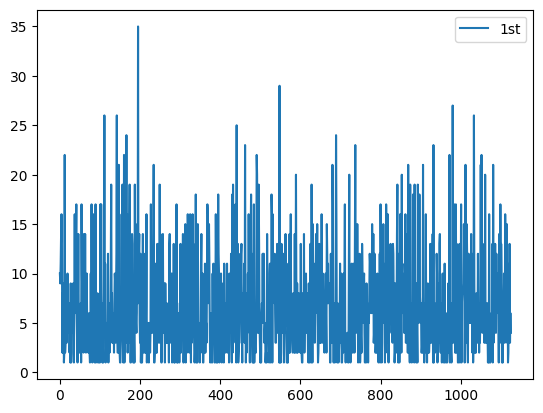

In [35]:
lotto_data.loc[:,["1st"]].plot()

In [6]:
# Extract the lotto numbers from the dataset
numbers = lotto_data.iloc[:, 1:7].values.flatten()

In [11]:
# Count the frequency of each number
unique, counts = np.unique(numbers, return_counts=True)
frequency = dict(zip(unique, counts))

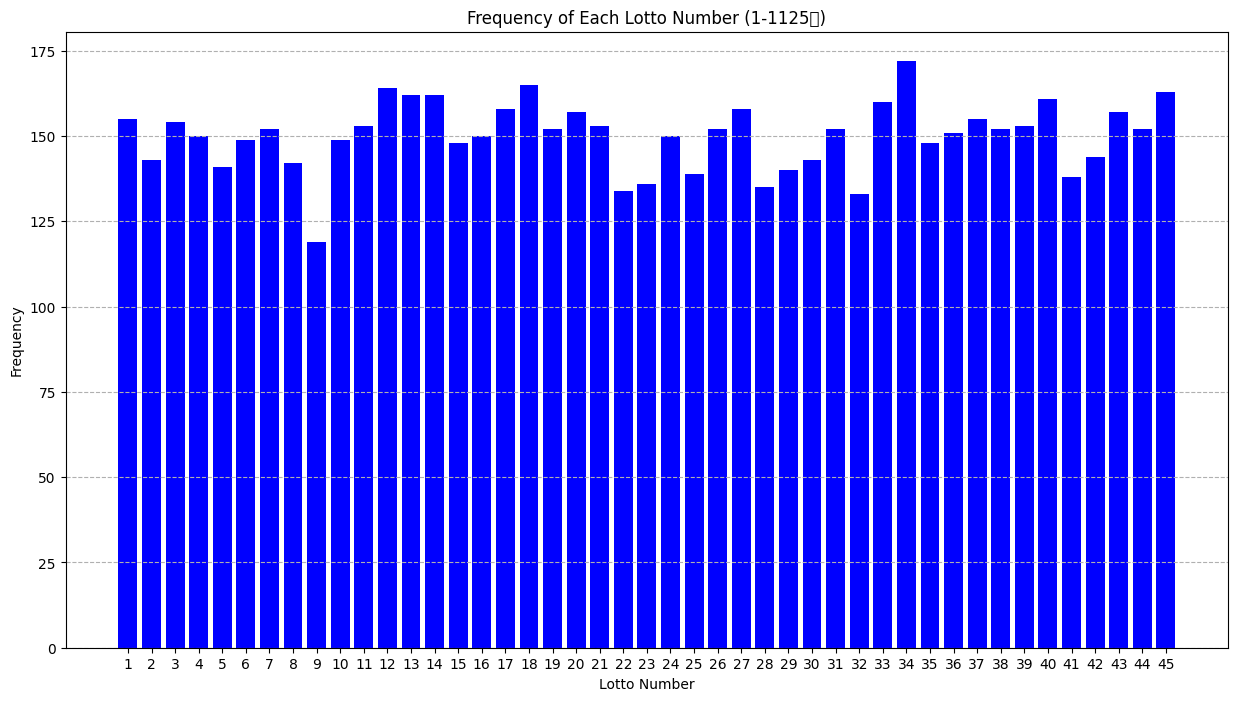

In [19]:
# Create a bar plot for the frequency of each number
plt.figure(figsize=(15, 8))
plt.bar(frequency.keys(), frequency.values(), color='blue')
plt.xlabel('Lotto Number')
plt.ylabel('Frequency')
plt.title('Frequency of Each Lotto Number (1-1125회)')
plt.xticks(range(1, 46))
plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
# Function to find consecutive pairs
def find_consecutive_pairs(numbers):
    pairs = []
    for num_set in numbers:
        sorted_set = sorted(num_set)
        for i in range(len(sorted_set) - 1):
            if sorted_set[i+1] - sorted_set[i] == 1:
                pairs.append((sorted_set[i], sorted_set[i+1]))
    return pairs

In [ ]:
# Extract the lotto numbers for each draw
draws = lotto_data.iloc[:, 1:7].values
consecutive_pairs = find_consecutive_pairs(draws)

In [ ]:
# Count the frequency of each consecutive pair
pair_counts = Counter(consecutive_pairs)

In [ ]:
# Sort pairs by frequency
sorted_pairs = dict(sorted(pair_counts.items(), key=lambda item: item[1], reverse=True))

In [ ]:
# Plot the most common consecutive pairs
pairs, frequencies = zip(*sorted_pairs.items())
pairs = [f'{pair[0]}-{pair[1]}' for pair in pairs]

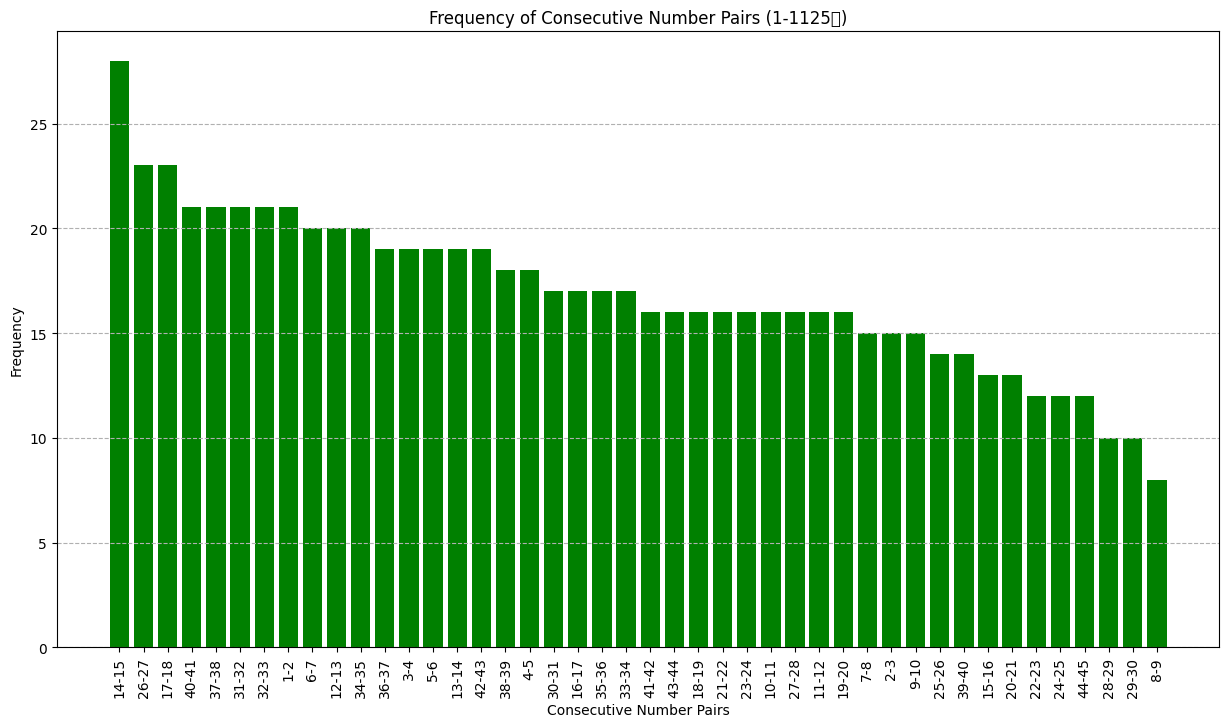

In [20]:
plt.figure(figsize=(15, 8))
plt.bar(pairs, frequencies, color='green')
plt.xlabel('Consecutive Number Pairs')
plt.ylabel('Frequency')
plt.title('Frequency of Consecutive Number Pairs (1-1125회)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--')
plt.show()

In [21]:
draws = lotto_data.iloc[:, 1:7].values

array([[10, 23, 29, 33, 37, 40],
       [ 9, 13, 21, 25, 32, 42],
       [11, 16, 19, 21, 27, 31],
       ...,
       [ 3,  8, 17, 30, 33, 34],
       [ 6, 14, 25, 33, 40, 44],
       [ 4,  5,  9, 11, 37, 40]], dtype=int64)

In [22]:
# Create a dataframe for correlation analysis
number_pairs = np.array([numbers]).T
df_numbers = pd.DataFrame(data=draws, columns=['1st', '2nd', '3rd', '4th', '5th', '6th'])

In [24]:
df_numbers

,1st,2nd,3rd,4th,5th,6th
0,10,23,29,33,37,40
1,9,13,21,25,32,42
2,11,16,19,21,27,31
3,14,27,30,31,40,42
4,16,24,29,40,41,42
...,...,...,...,...,...,...
1121,3,6,21,30,34,35
1122,13,19,21,24,34,35
1123,3,8,17,30,33,34
1124,6,14,25,33,40,44


In [22]:
# Compute the correlation matrix
correlation_matrix = df_numbers.corr()

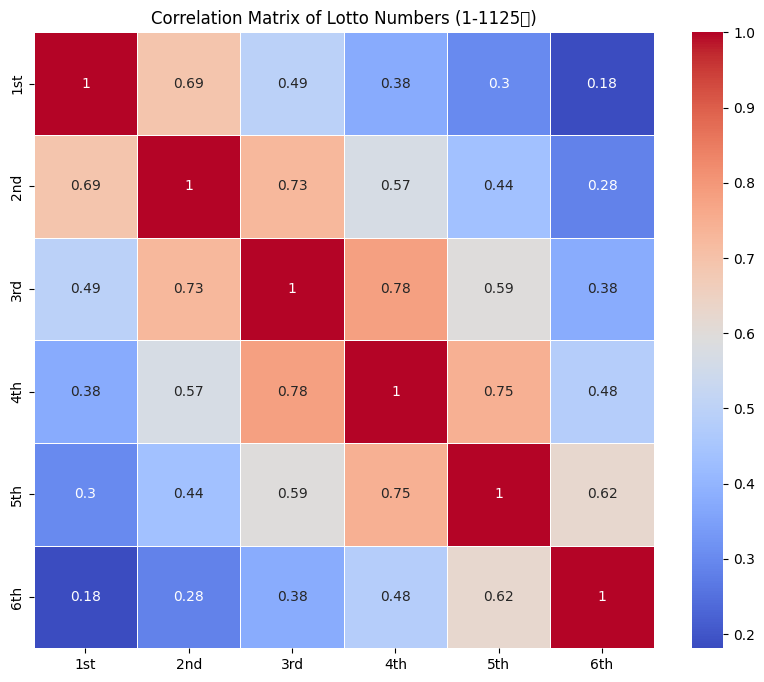

In [23]:
# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Lotto Numbers (1-1125회)')
plt.show()

In [24]:
# Extract year from the date and add it as a new column
lotto_data['year'] = pd.to_datetime(lotto_data.iloc[:, 0]).dt.year

In [25]:
# Group by year and count the frequency of each number
yearly_counts = pd.DataFrame(index=range(1, 46))

In [26]:
for year, group in lotto_data.groupby('year'):
    yearly_counts[year] = group.iloc[:, 1:7].apply(pd.Series.value_counts).sum(axis=1)

In [27]:
# Fill NaN values with 0
yearly_counts = yearly_counts.fillna(0).astype(int)

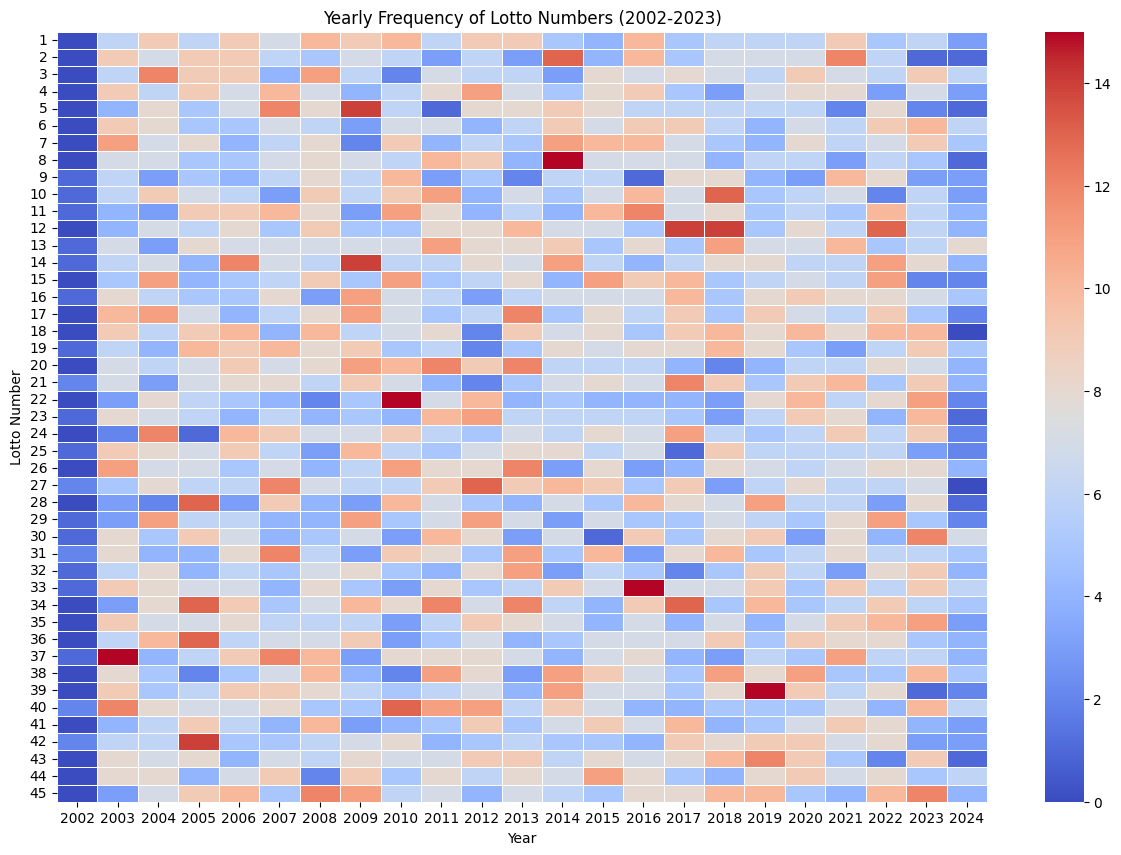

In [28]:
# Plot the yearly frequency of numbers
plt.figure(figsize=(15, 10))
sns.heatmap(yearly_counts, cmap='coolwarm', linewidths=0.5)
plt.title('Yearly Frequency of Lotto Numbers (2002-2023)')
plt.xlabel('Year')
plt.ylabel('Lotto Number')
plt.show()

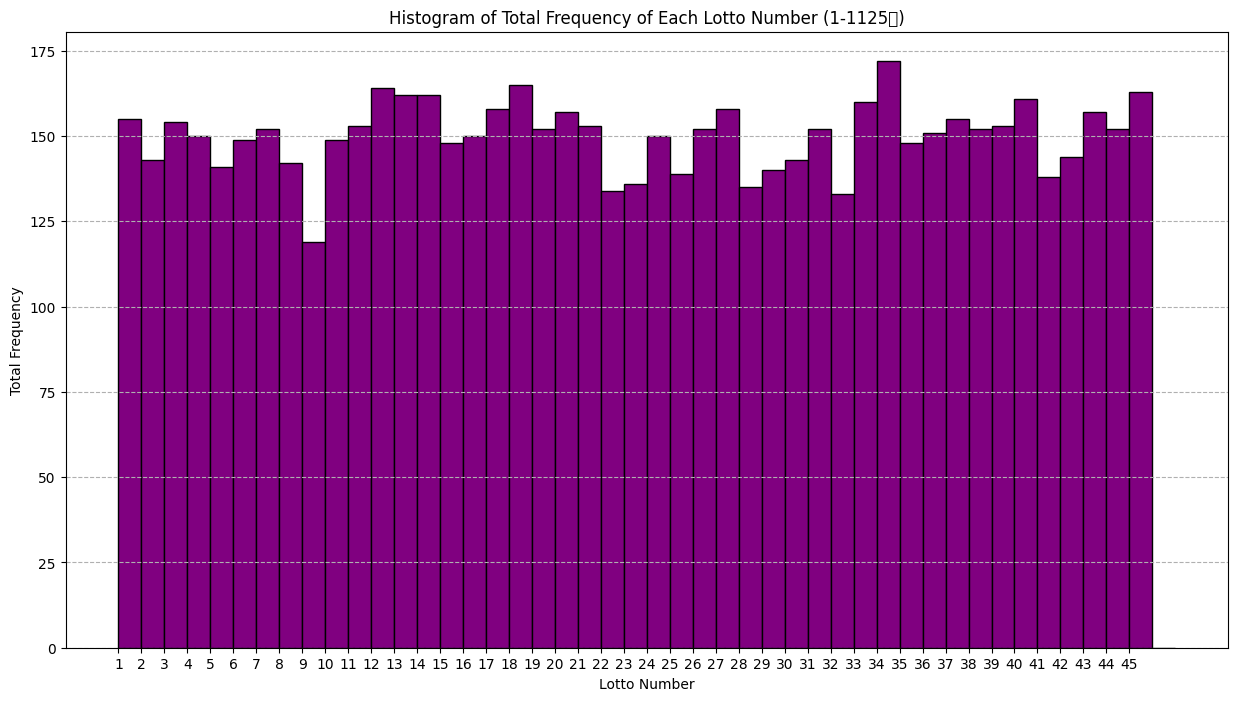

In [29]:
# Histogram of the total frequency of each number
plt.figure(figsize=(15, 8))
plt.hist(numbers, bins=range(1, 48), edgecolor='black', color='purple')
plt.xlabel('Lotto Number')
plt.ylabel('Total Frequency')
plt.title('Histogram of Total Frequency of Each Lotto Number (1-1125회)')
plt.xticks(range(1, 46))
plt.grid(axis='y', linestyle='--')
plt.show()

In [30]:
# Line graph of the yearly frequency of a few selected numbers
selected_numbers = [1, 10, 20, 30, 40]

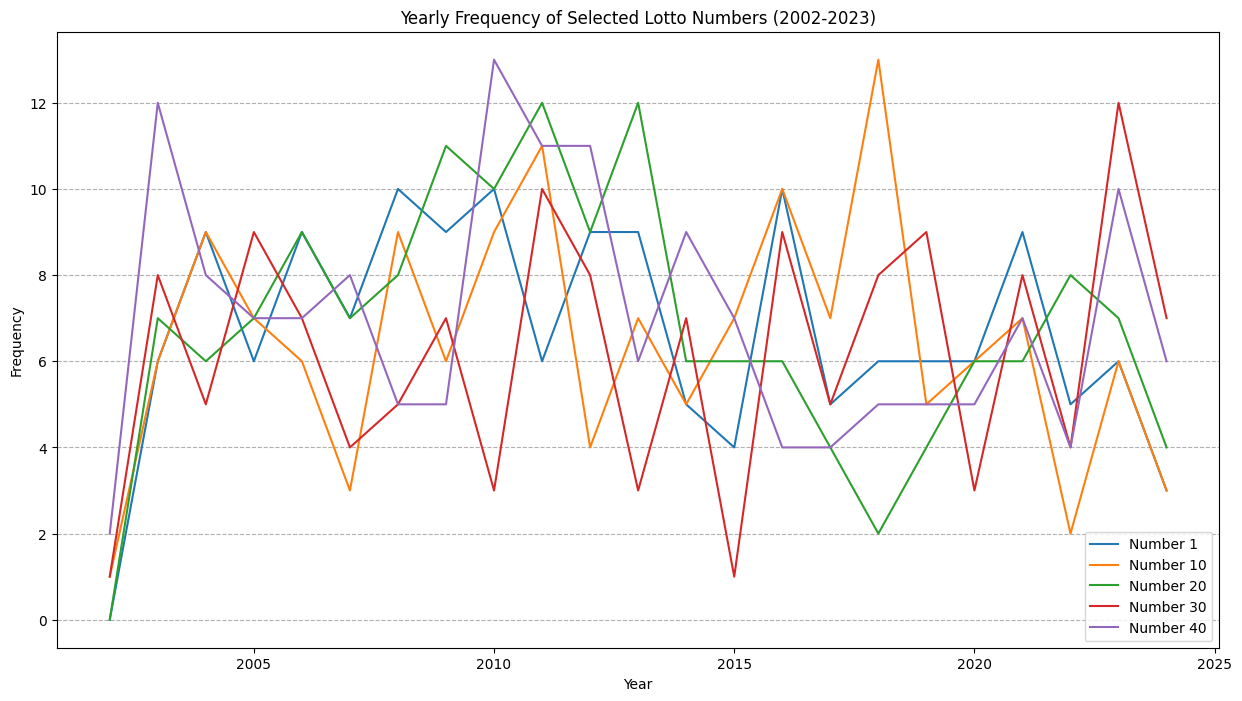

In [31]:
plt.figure(figsize=(15, 8))
for number in selected_numbers:
    plt.plot(yearly_counts.columns, yearly_counts.loc[number], label=f'Number {number}')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Yearly Frequency of Selected Lotto Numbers (2002-2023)')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

# Load the lotto data from the uploaded CSV file
file_path = 'lotto_numbers.csv'
lotto_data = pd.read_csv(file_path)

# Prepare the data for the model
X = lotto_data.index.values.reshape(-1, 1)  # 회차 번호를 X 값으로 사용
y = lotto_data.iloc[:, 1:7].values  # 각 회차별 번호들을 y 값으로 사용

# Split the data into training (800 samples) and testing sets (remaining samples)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=800, random_state=42)

# Create and train the MultiOutputRegressor with Linear Regression model
multi_output_model = MultiOutputRegressor(LinearRegression())
multi_output_model.fit(X_train, y_train)

# Predict the test set results
y_pred = multi_output_model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)

# Predict the next draw (1125회차)
next_draw_prediction = multi_output_model.predict(np.array([[1124]]))

# Round the predicted values to the nearest integers and clip to the valid range of lotto numbers
next_draw_prediction = np.round(next_draw_prediction).astype(int)
next_draw_prediction = np.clip(next_draw_prediction, 1, 45)

print("Mean Squared Error (MSE):", mse)
print("Predicted numbers for the next draw (1125회차):", next_draw_prediction[0])

Mean Squared Error (MSE): 41.12039917444915
Predicted numbers for the next draw (1125회차): [ 7 14 20 26 33 40]


In [65]:
# Define the target combination
target_combination = {7, 14, 20, 26, 33, 40}

# Function to check if the target combination exists in the row
def check_combination(row):
    return target_combination == set(row[1:7])

# Apply the function to each row and find matches
matches = lotto_data.apply(check_combination, axis=1)

# Get the rows where the combination matches
matching_rows = lotto_data[matches]

print(f"Matching rows:\n{matching_rows}")

Matching rows:
Empty DataFrame
Columns: [Unnamed: 0, 1st, 2nd, 3rd, 4th, 5th, 6th, bonus]
Index: []
